In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import display
import dataloader

データロード

In [4]:
thermal_img_files = dataloader.get_img_files(dir_path="./images/modules",gray=False)

In [5]:
type(thermal_img_files), len(thermal_img_files)

(dict, 158)

データの加工

In [6]:
flatten_thermal_data = {k: v.reshape(-1,1) for k, v in thermal_img_files.items()}

In [7]:
type(flatten_thermal_data), len(flatten_thermal_data)

(dict, 158)

In [8]:
concated_thermal_data = np.concatenate([*flatten_thermal_data.values()])

In [9]:
type(concated_thermal_data), len(concated_thermal_data)

(numpy.ndarray, 252813)

温度分布の確認（個別）

In [10]:
#for k, v in flatten_thermal_data.items():    
for k in list(flatten_thermal_data.keys())[:10]:
    v = flatten_thermal_data[k]
    filepath = "./hist/hist_" + k
    print(filepath)
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1,1,1)
    ax.hist(v,bins = 100, alpha = 0.5)
    ax.set_title(k)
    ax.set_xlabel('pxil value')
    ax.set_ylabel('freq')
    plt.savefig(filepath)    
    #plt.show()    
    plt.close()

./hist/hist_63.jpg
./hist/hist_189.jpg
./hist/hist_77.jpg
./hist/hist_162.jpg
./hist/hist_176.jpg
./hist/hist_88.jpg
./hist/hist_200.jpg
./hist/hist_201.jpg
./hist/hist_188.jpg
./hist/hist_76.jpg


温度分布の確認（全体）

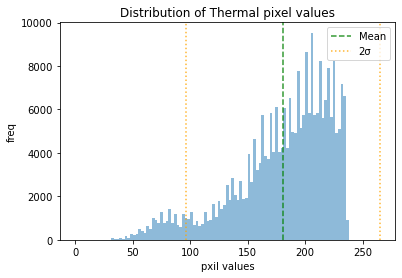

In [11]:
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(1,1,1)
ax.hist(concated_thermal_data, bins = 100, alpha = 0.5)
ax.axvline(x = concated_thermal_data.mean(), 
           color = 'green', 
           alpha = 0.8, 
           linestyle = '--', 
           label = 'Mean')
ax.axvline(x = concated_thermal_data.mean() - 2*concated_thermal_data.std(ddof=1), 
           color = 'orange', 
           alpha = 0.8, 
           linestyle = ':', 
           label = '2σ')
ax.axvline(x = concated_thermal_data.mean() + 2*concated_thermal_data.std(ddof=1), 
           color = 'orange', 
           alpha = 0.8, 
           linestyle = ':')
ax.set_title("Distribution of Thermal pixel values")
ax.set_xlabel('pxil values')
ax.set_ylabel('freq')
ax.legend(loc='upper right')
plt.show()

個別画像の分析

In [12]:
input_file = "images/modules/72.jpg"
#input_file = "images/modules/112.jpg"
#input_file = "images/modules/126.jpg"
#input_file = "images/modules/130.jpg"

In [13]:
img = cv2.imread(input_file)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

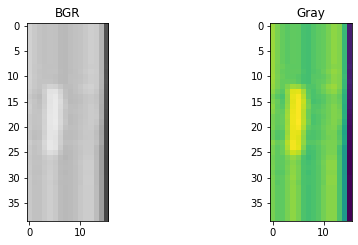

In [14]:
fig = plt.figure(figsize=(16,8),facecolor="w")
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(img)
ax1.set_title("BGR")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_gray)
ax2.set_title("Gray")
plt.show()

In [15]:
#flatten = img.reshape(-1,3)
flatten = img_gray.reshape(-1,1)

In [16]:
print(flatten.shape)

(624, 1)


In [17]:
def get_KMeans_results(inputs):
    from sklearn.cluster import KMeans
    pred = KMeans(n_clusters=5).fit(inputs)
    clusters = []
    for n in range(pred.n_clusters):
        clusters.append(np.array([data.tolist() for label, data in zip(pred.labels_,inputs) if label==n]))
    return clusters, pred

In [18]:
clusters, pred = get_KMeans_results(flatten)

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

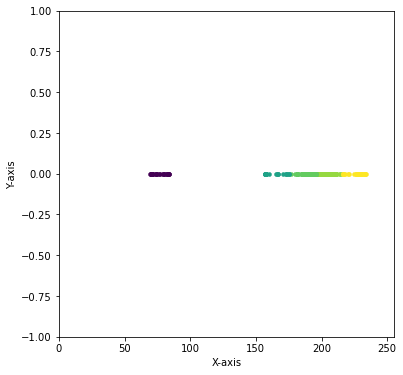

In [20]:
display.plot_2d_scatters_for_clusters(clusters, pred)
#display.plot_3d_scatters_for_clusters(clusters, pred)

In [23]:
centers = np.uint8(pred.cluster_centers_)
img_clustered = centers[pred.labels_]
img_clustered = img_clustered.reshape(img_gray.shape)

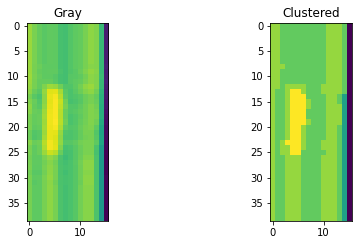

In [24]:
fig = plt.figure(figsize=(16,8),facecolor="w")
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(img_gray)
ax1.set_title("Gray")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_clustered)
ax2.set_title("Clustered")
plt.show()